**This notebook calculates the correlation between Covid 7-day incidence (as reported on 16th Dec 2020) in the German Landkreise (districts) and the 2017 voting outcome of the highest-result parties in the Bundestag (state parliament).**

Sources: 
https://www.regionalstatistik.de/genesis//online?operation=table&code=14111-01-03-4&bypass=true&levelindex=0&levelid=1608119964109#abreadcrumb
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab.html on 16/12/2020
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
landkreise = pd.read_csv("regionalstatistik_btw17_landkreise.csv", header=2, index_col=0)
landkreise.rename(columns={'Unnamed: 2': 'Zweitstimmen_gesamt', 'Unnamed: 3': 'Wahlbeteiligung'}, inplace=True)

covidcases = pd.read_csv("fallzahlen_161220.csv", header=3, dtype=str)
covidcases = covidcases.set_index('LKNR')
landkreise

,Unnamed: 1,Zweitstimmen_gesamt,Wahlbeteiligung,Unnamed: 4,CDU/CSU,SPD,GRÜNE,FDP,DIE LINKE,AfD,Sonstige Parteien
NaN,NaN,Anzahl,Prozent,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl
DG,Deutschland,61688485,76.2,46515492,15317344,9539381,4158400,4999449,4297270,5878115,2325533
01,Schleswig-Holstein,2266012,76.3,1715641,583135,399505,205471,216844,124678,140362,45646
01001,"Flensburg, Kreisfreie Stadt",70105,70.9,49271,13382,12142,7416,5073,5699,3702,1857
01002,"Kiel, Landeshauptstadt, Kreisfreie Stadt",186988,74.1,137368,35525,33093,23995,15697,14699,9524,4835
...,...,...,...,...,...,...,...,...,...,...,...
"die Partei ""PDS"" und vom 17.07.2005 bis einschließlich",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"15.06.2007 die Partei ""Die Linke."" nachgewiesen.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"© Statistische Ämter des Bundes und der Länder, Deutschland, 2020.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dieses Werk ist lizenziert unter der Datenlizenz Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covidcases

,Landkreis,Anzahl,Inzidenz
LKNR,,,
05334,StadtRegion Aachen,867,156
07131,LK Ahrweiler,134,103
09771,LK Aichach-Friedberg,164,122
08425,LK Alb-Donau-Kreis,370,188
16077,LK Altenburger Land,418,468
...,...,...,...
09663,SK Würzburg,105,82
09679,LK Würzburg,117,72
08417,LK Zollernalbkreis,340,180


In [4]:
parties = {'CDU/CSU': 'k', 'GRÜNE': 'g', 'SPD': 'r', 'FDP': 'y', 'DIE LINKE': 'm', 'AfD': 'b'}

# join the two dataframes on the LKNR column
covidcases = covidcases.join(landkreise[list(parties.keys())+['Zweitstimmen_gesamt']]).dropna()
covidcases

,Landkreis,Anzahl,Inzidenz,CDU/CSU,GRÜNE,SPD,FDP,DIE LINKE,AfD,Zweitstimmen_gesamt
01001,SK Flensburg,47,52,13382,7416,12142,5073,5699,3702,70105
01002,SK Kiel,268,109,35525,23995,33093,15697,14699,9524,186988
01003,SK Lübeck,370,171,34108,15223,30109,12666,11431,10461,166673
01004,SK Neumünster,71,89,12407,4179,10252,4830,2831,4124,60378
01051,LK Dithmarschen,86,65,28400,6222,18087,11263,4764,6626,107148
...,...,...,...,...,...,...,...,...,...,...
16073,LK Saalfeld-Rudolstadt,275,266,17611,2066,8125,5070,10912,18010,92002
16074,LK Saale-Holzland-Kreis,173,209,15688,1704,6092,4473,8822,12278,68855
16075,LK Saale-Orla-Kreis,309,385,14470,1354,6210,3666,8354,13452,68269
16076,LK Greiz,258,265,19139,1775,7171,5468,9945,16203,84711


In [5]:
plot_data = covidcases[list(parties.keys())+['Inzidenz', 'Zweitstimmen_gesamt', 'Landkreis']]
plot_data[list(parties.keys())+['Inzidenz', 'Zweitstimmen_gesamt']] = plot_data[list(parties.keys())+['Inzidenz', 'Zweitstimmen_gesamt']].astype(float)
for partyname in parties.keys():
    plot_data[partyname] = plot_data[partyname]/plot_data['Zweitstimmen_gesamt']*100
plot_data

,CDU/CSU,GRÜNE,SPD,FDP,DIE LINKE,AfD,Inzidenz,Zweitstimmen_gesamt,Landkreis
01001,19.088510,10.578418,17.319735,7.236288,8.129235,5.280650,52.0,70105.0,SK Flensburg
01002,18.998545,12.832374,17.697927,8.394656,7.860932,5.093375,109.0,186988.0,SK Kiel
01003,20.464022,9.133453,18.064714,7.599311,6.858339,6.276361,171.0,166673.0,SK Lübeck
01004,20.548875,6.921395,16.979695,7.999603,4.688794,6.830302,89.0,60378.0,SK Neumünster
01051,26.505394,5.806921,16.880390,10.511629,4.446187,6.183970,65.0,107148.0,LK Dithmarschen
...,...,...,...,...,...,...,...,...,...
16073,19.141975,2.245603,8.831330,5.510750,11.860612,19.575661,266.0,92002.0,LK Saalfeld-Rudolstadt
16074,22.784112,2.474766,8.847578,6.496260,12.812432,17.831675,209.0,68855.0,LK Saale-Holzland-Kreis
16075,21.195565,1.983331,9.096369,5.369934,12.236886,19.704405,385.0,68269.0,LK Saale-Orla-Kreis
16076,22.593288,2.095360,8.465252,6.454888,11.739916,19.127386,265.0,84711.0,LK Greiz


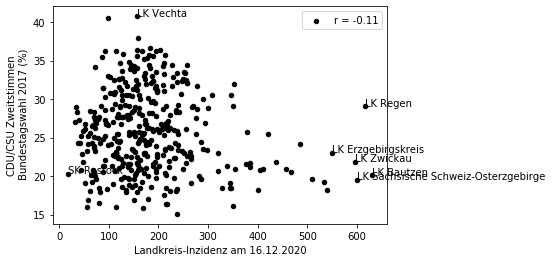

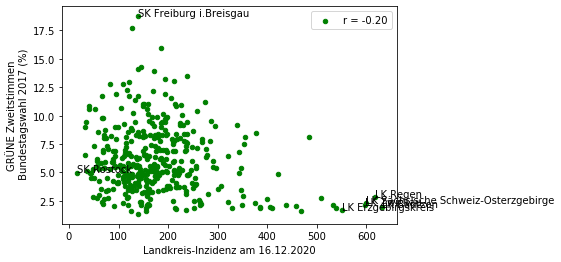

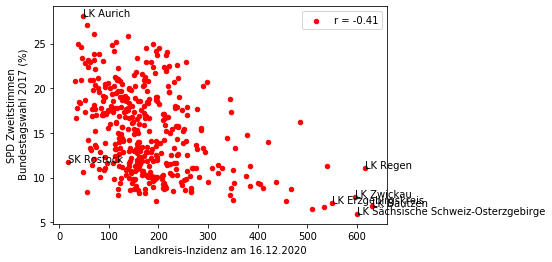

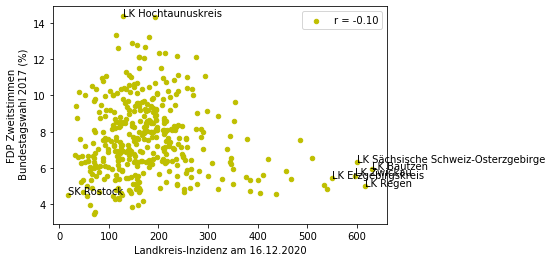

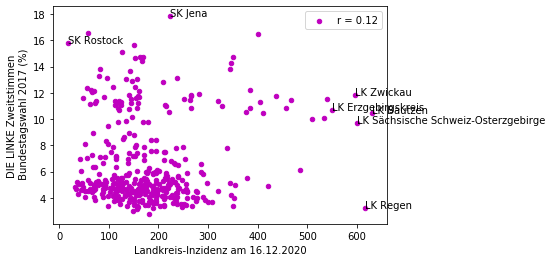

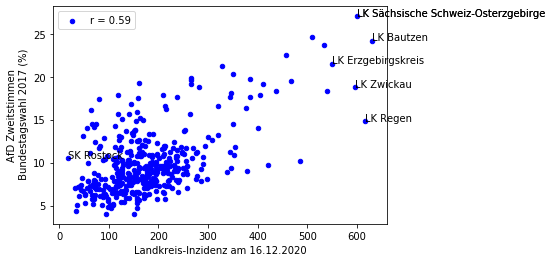

In [6]:
%matplotlib inline
correlations = {}
for partyname, color in parties.items():
    # calculate Pearson correlation
    correlation = plot_data['Inzidenz'].corr(plot_data[partyname])
    correlations[partyname] = correlation
    
    # plot scatterplot
    ax = plot_data.plot.scatter('Inzidenz', partyname, color=color, label="r = %.2f" % correlation)
    plt.xlabel("Landkreis-Inzidenz am 16.12.2020")
    plt.ylabel(partyname+" Zweitstimmen\n Bundestagswahl 2017 (%)")
    plt.legend()

    # label a few interesting points
    max_incidence = plot_data.iloc[plot_data['Inzidenz'].argmax()]
    max_vote      = plot_data.iloc[plot_data[partyname].argmax()]
    min_incidence = plot_data.iloc[plot_data['Inzidenz'].argmin()]
    top5_incidence = [plot_data.nlargest(5, 'Inzidenz').iloc[i] for i in range(5)]

    for point in [max_vote, min_incidence]+top5_incidence:
        ax.text(point['Inzidenz'], point[partyname], point['Landkreis'])

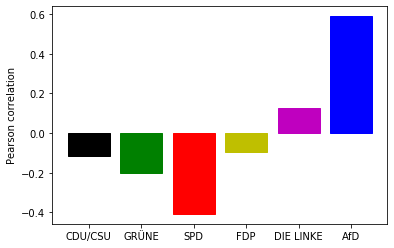

In [7]:
barlist = plt.bar(*zip(*correlations.items()))
i = 0
for color in parties.values():
    barlist[i].set_color(color)
    i += 1
plt.ylabel("Pearson correlation")
plt.show()